# Neural Networks with Kera

## 1 - Preload

In [65]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()  

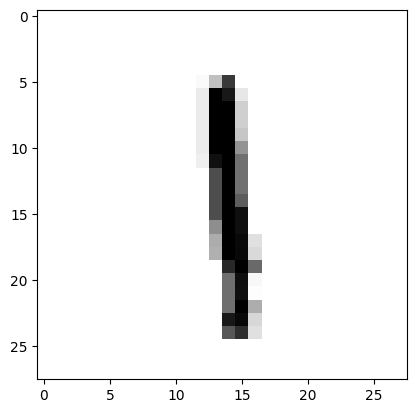

In [66]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)  

In [67]:
print(y_train[8])

1


## 2 - Preprocessing

In [68]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000,784)  

print(x_train.shape)
print(x_test.shape)  

(60000, 784)
(10000, 784)


In [69]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## 3 - Model definition

In [70]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))  

In [71]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

## 4 - Configuration

In [72]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])  

## 5 - Training

In [73]:
model.fit(x_train, y_train, epochs=5)  

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 339us/step - accuracy: 0.3526 - loss: 2.1235
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - accuracy: 0.6843 - loss: 1.4468
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - accuracy: 0.7795 - loss: 1.0496
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - accuracy: 0.8246 - loss: 0.8239
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step - accuracy: 0.8472 - loss: 0.6970


## 6 - Evaluation

In [74]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8419 - loss: 0.6718


## 7 - Prediction

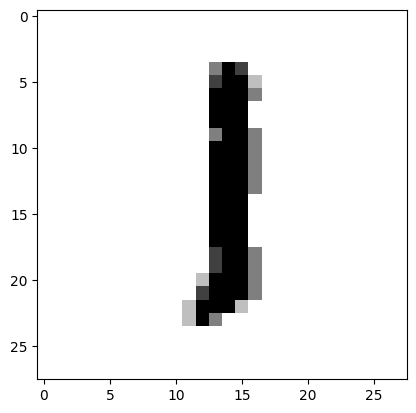

In [75]:
plt.imshow(x_test[14].reshape((28,28)), cmap=plt.cm.binary)

In [76]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step


In [77]:
predictions[14]

array([1.3218487e-03, 9.0637708e-01, 1.8190075e-02, 2.6444919e-02,
       2.9969047e-04, 7.3137605e-03, 9.7005395e-03, 6.8933675e-03,
       2.0155258e-02, 3.3034151e-03], dtype=float32)

In [78]:
import numpy as np
np.argmax(predictions[14])

np.int64(1)